In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset de ventas desde un archivo CSV
file_path = "/content/Online_Retail.csv"
sales_data = pd.read_csv(file_path, encoding="windows-1252")

# Convertir la columna "InvoiceDate" a tipo datetime
sales_data['InvoiceDate'] = pd.to_datetime(sales_data["InvoiceDate"])

# Eliminar filas con valores faltantes en las columnas críticas
sales_data.dropna(subset=["CustomerID", "InvoiceDate"], inplace=True)

# Crear una nueva columna "TotalPrice"
sales_data["TotalPrice"] = sales_data["Quantity"] * sales_data["UnitPrice"]
print(sales_data.head())

<ipython-input-1-bc8f180e4225>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['InvoiceDate'] = pd.to_datetime(sales_data["InvoiceDate"])


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


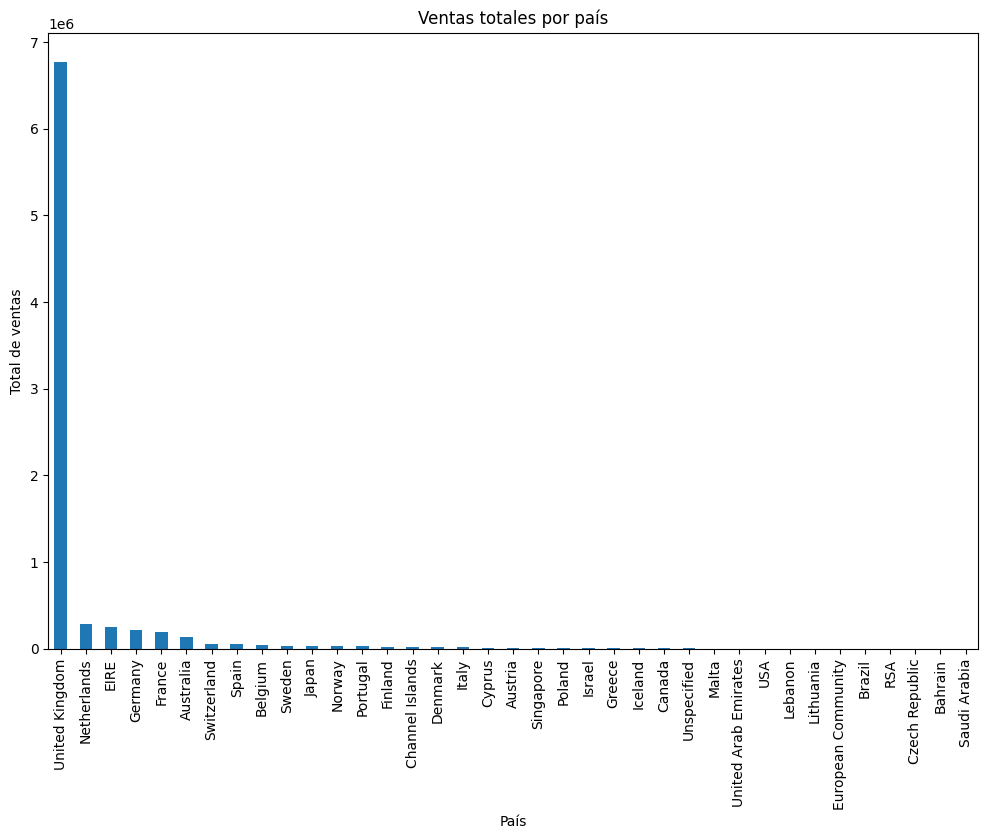

In [3]:
sales_by_country = sales_data.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
# print(sales_by_country)

plt.figure(figsize=(12,8))
sales_by_country.plot(kind="bar")
plt.title("Ventas totales por país")
plt.xlabel("País")
plt.ylabel("Total de ventas")
plt.show()

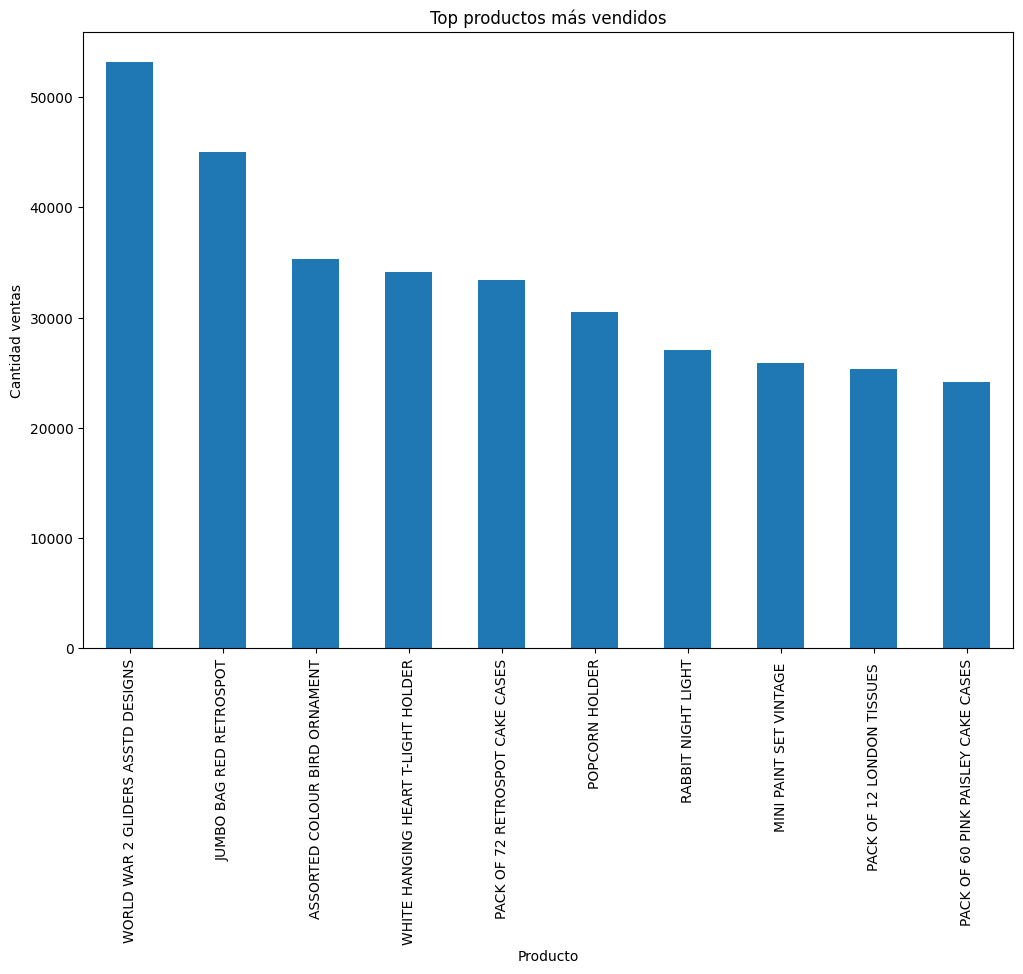

In [5]:
quantity_by_product = sales_data.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(10)

plt.figure(figsize=(12,8))
quantity_by_product.plot(kind="bar")
plt.title("Top productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad ventas")
plt.show()

In [6]:
# Identificar el producto más vendido
top_product = sales_data.groupby('Description')['Quantity'].sum().idxmax()
top_product_quantity = sales_data.groupby('Description')['Quantity'].sum().max()
print(f"El producto más vendido es {top_product} con un total de {top_product_quantity}")

El producto más vendido es WORLD WAR 2 GLIDERS ASSTD DESIGNS con un total de 53215
